In [1]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv('../nlp-labs/tobacco-lab/data/Tobacco3482.csv')
data.head(10)

,img_path,label
0,Advertisement/0000136188.jpg,Advertisement
1,Advertisement/0000435350.jpg,Advertisement
2,Advertisement/0000556056.jpg,Advertisement
3,Advertisement/0030048095.jpg,Advertisement
4,Advertisement/0030048989.jpg,Advertisement
5,Advertisement/0030049569.jpg,Advertisement
6,Advertisement/03496270.jpg,Advertisement
7,Advertisement/03567810.jpg,Advertisement
8,Advertisement/03722789.jpg,Advertisement
9,Advertisement/04102204.jpg,Advertisement


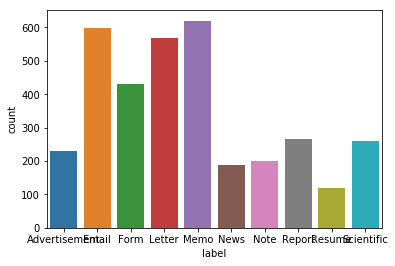

In [3]:
g = sns.countplot(data['label'],orient='h')
g

In [4]:
list_files = []
for root, dirs, files in os.walk("./data", topdown=False):
    for name in files:
        if ".txt" in os.path.join(root, name) :
            list_files.append(os.path.join(root, name))

list_text = []
for file in list_files:
    file_object = open(file,'r')
    list_text.append(file_object.read())
    

In [5]:
dict_data = {}
for i in range(len(data['img_path'])):
    dict_data['../nlp-labs/tobacco-lab/data/'+data['img_path'][i].replace('jpg','txt')] = data['label'][i] 
X = []
y = []
for i in dict_data:
    file_object = open(i,"r")
    X.append(file_object.read())
    file_object.close()
    y.append(dict_data[i])

In [6]:

X_train, X_test,y_train,  y_test = train_test_split(X,y, test_size=0.2)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size = 0.25)

In [7]:

def model_NB_train(X_train,y_train,max_features = 2000):
    # On vectorize nos tweets
    vectorizer = CountVectorizer(max_features=2000)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    
    # On entraine nos Naives Bayes
    model = MultinomialNB()
    model.fit(X_train_counts,y_train)

    y_pred_train = model.predict(X_train_counts)
   
    print("Evalution (Phase de train) : ",accuracy_score(y_train,y_pred_train))
    return model,vectorizer

def model_NB_test(model,vectorizer,X_test,y_test):
    
    X_test_counts = vectorizer.transform(X_test)

    y_pred_test = model.predict(X_test_counts)
    
    print("Evalution (Phase de test) : ",accuracy_score(y_test,y_pred_test),"\n")
    print(classification_report(y_test,y_pred_test))
    print(confusion_matrix(y_test,y_pred_test))
    return model

model,vectorizer = model_NB_train(X_train,y_train)
model_NB_test(model,vectorizer,X_test,y_test)


Evalution (Phase de train) :  0.8275862068965517
Evalution (Phase de test) :  0.7116212338593975 

               precision    recall  f1-score   support

Advertisement       0.63      0.58      0.60        45
        Email       0.93      0.93      0.93       122
         Form       0.84      0.74      0.79        87
       Letter       0.66      0.69      0.68       118
         Memo       0.65      0.72      0.68       127
         News       0.62      0.71      0.66        34
         Note       0.46      0.49      0.47        37
       Report       0.50      0.43      0.47        46
       Resume       0.93      1.00      0.97        28
   Scientific       0.63      0.55      0.59        53

    micro avg       0.71      0.71      0.71       697
    macro avg       0.69      0.68      0.68       697
 weighted avg       0.71      0.71      0.71       697

[[ 26   1   1   3   3   1   7   3   0   0]
 [  0 114   0   5   2   0   0   1   0   0]
 [  6   1  64   3   3   0   8   1   0   1]

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Commentaires 

Pas de soucis pour retrouver les CVs, ça il y arrive bien. 

In [16]:
model = MLPClassifier(10,activation='logistic',solver='adam')

X_train_counts = vectorizer.transform(X_train)
X_test_counts = vectorizer.transform(X_test)

model.fit(X_train_counts,y_train)

/home/tbernard/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [18]:
y_pred_train = model.predict(X_train_counts)
print("Evalution (Phase de train) : ",accuracy_score(y_train,y_pred_train))
y_pred_test = model.predict(X_test_counts)
    
print("Evalution (Phase de test) : ",accuracy_score(y_test,y_pred_test),"\n")
print(classification_report(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))


Evalution (Phase de train) :  0.9870689655172413
Evalution (Phase de test) :  0.7460545193687231 

               precision    recall  f1-score   support

Advertisement       0.77      0.60      0.68        45
        Email       0.94      0.93      0.94       122
         Form       0.80      0.84      0.82        87
       Letter       0.68      0.78      0.73       118
         Memo       0.71      0.80      0.76       127
         News       0.73      0.71      0.72        34
         Note       0.50      0.65      0.56        37
       Report       0.48      0.33      0.39        46
       Resume       1.00      1.00      1.00        28
   Scientific       0.66      0.40      0.49        53

    micro avg       0.75      0.75      0.75       697
    macro avg       0.73      0.70      0.71       697
 weighted avg       0.74      0.75      0.74       697

[[ 27   0   3   2   0   0  10   3   0   0]
 [  0 114   0   1   4   0   1   1   0   1]
 [  3   1  73   1   2   0   5   1   0   1]

In [19]:
# Hyperameters optimization with GridSearchCV = parallel processing
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from pprint import pprint
from time import time
import logging
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('mlp', MLPClassifier()),
])


parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'mlp__activation': ('logistic','tanh','relu'),
    'mlp__hidden_layer_sizes' : (2,10),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=2)

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(X_test, y_test)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'mlp']
parameters:
{'mlp__activation': ('logistic', 'tanh', 'relu'),
 'mlp__hidden_layer_sizes': (2, 10),
 'vect__max_df': (0.5, 0.75, 1.0)}
Fitting 3 folds for each of 18 candidates, totalling 54 fits


/home/tbernard/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  2.4min finished
/home/tbernard/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


done in 151.456s

Best score: 0.669
Best parameters set:
	mlp__activation: 'tanh'
	mlp__hidden_layer_sizes: 10
	vect__max_df: 0.75


/home/tbernard/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [70]:
Sc= []

for i in range(len(X)):
    if (y[i]=='Scientific'):
        Sc.append(X[i])
    

In [71]:
len_A = [len(Sc[i]) for i in range(len(Sc))]
meanAd = np.mean(len_A)

In [72]:
meanAd = np.mean(len_A)
meanAd

2744.7318007662834

|Categorie|Nombre moyenne de lettre|slt|
|-----------------------------------|------|---|
|  Advertisement |  700 |Séquence de mots paragraphés. ON peut distinguer des phrases par moment.|
|  Email         |  686 |Les séquences reconnus sont de très bonnes qualité. Mots récurrents : From, To, Sent, Date,...|
|  Forms        | 991  |Beaucoup de caractères seuls ou disparates. Peu de mots formés.|
|  lettres      | 1407 |Apréciation d|
|  Mémos         | 1302 |a|
|  Notes         | 250  |a|
|  News          | 3774 |a|
| Report        | 1870 |a|
|  CV            | 2646 |a|
|  Scientique    | 2744 |a|

In [80]:
for i in range (5): 
    print(L[i])

Letter to the Editor of Personnel Administrator

 

 

To the Editor:

As the owner of a company with about 100 employees, I found
Lewis Solmon's recent article, "The other side of the smoking
worker controversy,” interesting. I'd like to share my own

views, since I've had some experience with the issue.

A small but vocal group of employees have pressured me to
either ban smoking or to segregate smokers and nonsmokers.
When they first approached me I considered the situation but,

for several reasons, decided against any restrictions.

First, implementing smoking policies would have required ;
that I take action against good employees who have worked

for me for quite some time. Second, to implement a smoking
policy would have disrupted my company's work process, since,
as in many offices, employees with similar skills and responsi-

bilities work together.

Furthermore, once I took a hard look at the situation, I dis-
covered that the vast majority of my employees were neither

awar